In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../outputs/tulum_temp_precip_timeseries.csv')
df['date'] = pd.to_datetime(df['date'])


In [2]:
p95_precip = np.percentile(df['precipitation'] * 1000, 95)
p05_tmin = np.percentile(df['tmin'], 5)

df['precip_score'] = (df['precipitation'] * 1000 / p95_precip).clip(upper=1)
df['cold_score'] = (1 - (df['tmin'] - p05_tmin) / (df['tmin'].max() - p05_tmin)).clip(0, 1)
df['bad_weather'] = (df['precip_score'] + df['cold_score']) / 2


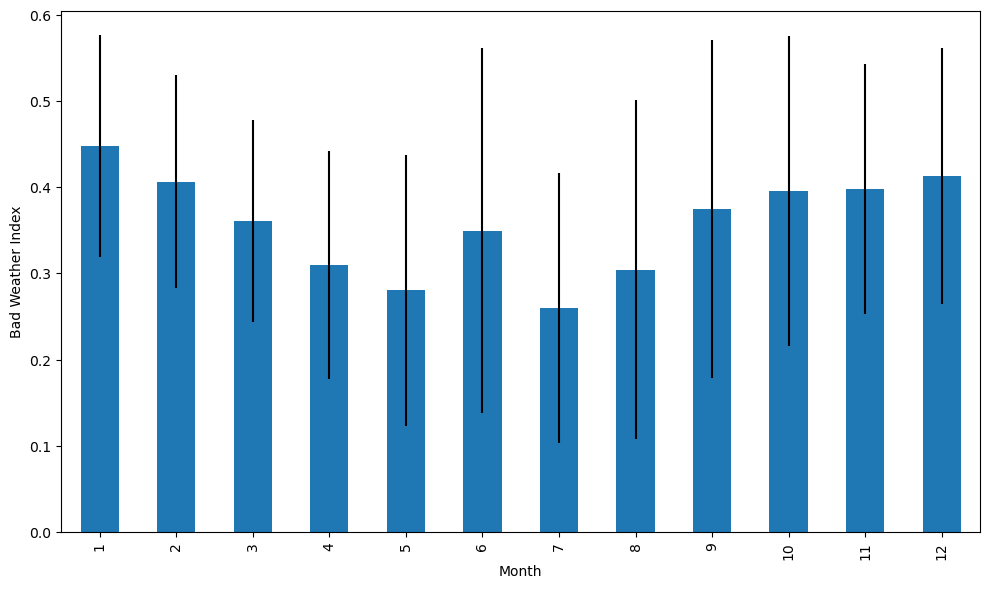

In [3]:
df['month'] = df['date'].dt.month
monthly_stats = df.groupby('month')['bad_weather'].agg(['mean', 'std', 'count'])

fig, ax = plt.subplots(figsize=(10, 6))
monthly_stats['mean'].plot(kind='bar', yerr=monthly_stats['std'], ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Bad Weather Index')
plt.tight_layout()


In [4]:
worst_days = df.nlargest(10, 'bad_weather')[['date', 'tmin', 'precipitation', 'bad_weather']].copy()
worst_days['precipitation'] *= 1000
print('Top 10 Worst Weather Days:')
print(worst_days.to_string(float_format=lambda x: '{:.2f}'.format(x)))


Top 10 Worst Weather Days:
           date  tmin  precipitation  bad_weather
1487 2019-01-27 18.74           5.99         1.00
1559 2019-04-09 21.53           8.14         0.97
419  2016-02-24 21.61           3.41         0.97
2915 2022-12-25 21.07           2.70         0.95
1200 2018-04-15 22.17           4.12         0.94
737  2017-01-07 22.38           3.44         0.92
2256 2021-03-06 22.53           5.40         0.91
3335 2024-02-18 20.68           2.43         0.91
1123 2018-01-28 22.66           4.08         0.90
2203 2021-01-12 22.67           3.02         0.90


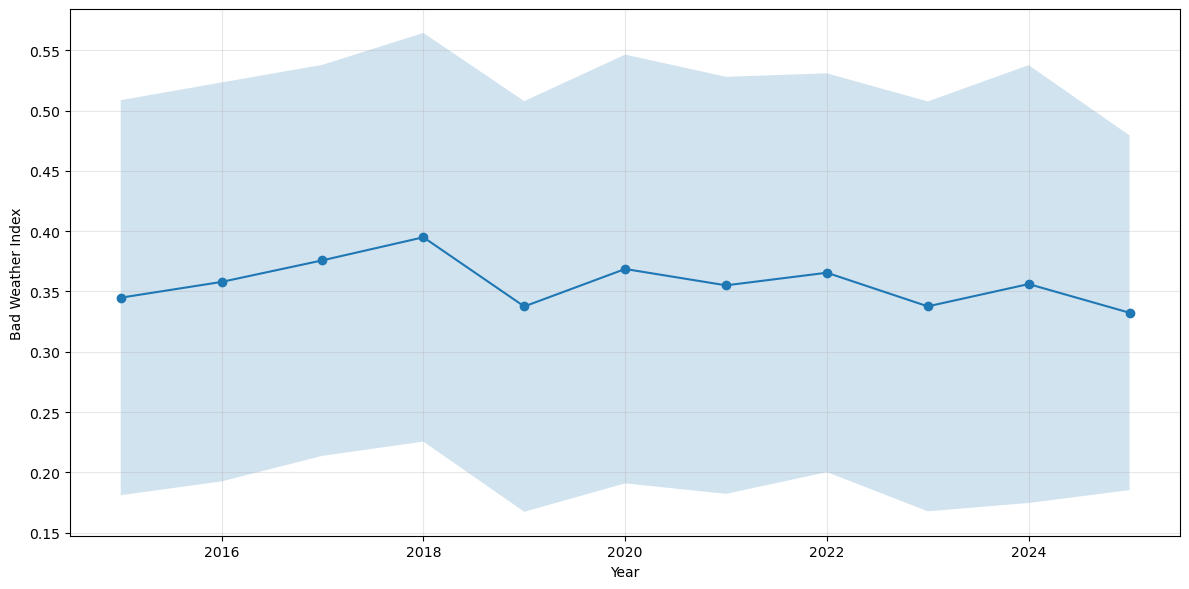

In [5]:
df['year'] = df['date'].dt.year
yearly_stats = df.groupby('year')['bad_weather'].agg(['mean', 'std', 'count'])

fig, ax = plt.subplots(figsize=(12, 6))
yearly_stats['mean'].plot(marker='o')
ax.fill_between(yearly_stats.index,
                yearly_stats['mean'] - yearly_stats['std'],
                yearly_stats['mean'] + yearly_stats['std'],
                alpha=0.2)
ax.set_xlabel('Year')
ax.set_ylabel('Bad Weather Index')
plt.grid(True, alpha=0.3)
plt.tight_layout()
